# Notebook for Running Calculations

In [1]:
import xgcm
import xarray as xr
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import pyplot as plt
from matplotlib import gridspec
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from xhistogram.xarray import histogram
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
%reload_ext autoreload
%autoreload 2
from chazbpei2020.preprocessing import *

---

## Calculations (all ensemble members)

In [4]:
# for index in range(24, 31):
#     if index < 10:
#         indexlabel = str(0)+str(index)
#     else:
#         indexlabel = str(index)
        
#     directory = '/local/ss23/GFDL_LEs/OCN/OMEGA_ARAG/RCP85/'
#     filename = 'omega_arag_k11_ens1'+indexlabel+'_1x1_1950_2100.nc'
#     oa_path = directory+filename
#     ds = xr.open_dataset(oa_path).rename({'XT_OCEAN': 'xt_ocean',
#                                          'YT_OCEAN': 'yt_ocean',
#                                          'TIME': 'time',
#                                          'OMEGA_ARAG': 'omega_arag'})
    
    
#     # -----------------------------------------------------------

#     # Calculate the time-mean Omega Arag throughout the simulation
#     da_oa_annual = ds.omega_arag.groupby('time.year').mean(dim='time', skipna=True).squeeze()

#     startyear = 1950
#     endyear = 2100
#     interval = 10  # plot decadal contours
#     span = interval//2

#     da_oa_mean = da_oa_annual.copy() # annual averages from 1950-2100
#     # da_oa_mean moving averages span from 1955-2095
# #     da_oa_mean = moving_avg(da_oa_annual, startyear, endyear, interval)

    
#     # -----------------------------------------------------------


#     # Definte projection transformations and coordiantes
#     crs = ccrs.Robinson(central_longitude=180)
#     src=ccrs.PlateCarree()
#     lon = ds.xt_ocean.data
#     lat = ds.yt_ocean.data


#     # Create levels array to isolate undersaturation threshold
#     clevs=[1]

#     # Create list of colors and legend for plots
#     colors = ['hotpink','magenta','darkviolet','purple',
#               'darkblue','blue','dodgerblue','turquoise',
#               'limegreen','lime','gold','darkorange',
#               'orangered','red','firebrick','maroon']

#     # (for decadal mean)
#     # colors = ['magenta','darkviolet','purple',
#     #           'darkblue','blue','dodgerblue','turquoise',
#     #           'limegreen','lime','gold','darkorange',
#     #           'orangered','red','firebrick','maroon']

#     num_contours = len(da_oa_mean)
#     num_colors = len(colors)
#     year=startyear+interval  # start in 1950
#     legend_years = []
#     c = 0
#     for i in range(span, num_contours, interval):
#         element = Patch(facecolor=colors[c], label=str(year))
#         legend_years.append(element)
#         year+=interval
#         c+=1

#     # -----------------------------------------------------------
#     # Calculate Velocities at undersaturation border for every 2 years
#     fig, ax = plt.subplots(figsize=[16,10],
#                                    subplot_kw={'projection':crs})

#     # Extract points from contour line segments for each year
#     list_xpoints = []  # list contianing lists of x points for each year
#     list_ypoints = []  # list contianing lists of y points for each year
#     for i in range(0, num_contours):
#         cs = ax.contour(lon,lat,da_oa_mean[i],levels=clevs,
#                         colors=colors[i%num_colors],transform=src)

#         segments = cs.allsegs[0]
#         num_segs = len(segments)

#         xpoints = []  # to track multiple paths within each year
#         ypoints = []
#         for j in range(num_segs):
#             x = segments[j][:,0].tolist()  # convert to list to be easily concatenated
#             y = segments[j][:,1].tolist()
#             for p in x:
#                 xpoints.append(p)
#             for p in y:
#                 ypoints.append(p)
#         list_xpoints.append(xpoints)  # add list of x points for each year
#         list_ypoints.append(ypoints)  # add list of y points for each year

#     ax.set_title('RCP85 Ensemble Avg, k11 $\Omega$Arag Undersaturation Thresholds',
#                  fontsize=22)
#     ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
#     ax.set_global()

#     # -----------------------------------------------------------

#     # For each contour, compute the minimum distance to the contour at
#     # the end of the interval

#     # Create parallel arrays of list to hold lists of directions and vectors for each decade
#     list_vector_dx = []  # change in x
#     list_vector_dy = []  # change in y
#     list_vector_magnitude = []  # distance to nearest points

#     for i in range(0, num_contours-interval):
#         vector_dx = []  # change in x for decade
#         vector_dy = []  # change in y for decade
#         vector_magnitude = []  # vector magnitude for year
#         xpoints = list_xpoints[i]  # x coords for year
#         ypoints = list_ypoints[i]  # y coords for year
#         # For each point, find min dist and closest point on contour 
#         # at the end of the time interval (one decade later)
#         num_points = len(xpoints)
#         for p in range(num_points):
#             xp = xpoints[p] # x value along contour
#             yp = ypoints[p] # y value along contour
#             x,y,dx,dy,mindist = min_dist(xp,yp,
#                                          list_xpoints[i+interval],
#                                          list_ypoints[i+interval],
#                                         da_oa_mean[i].data)
#             # maintain lists of x and y vectors
#     #         vector_dx.append(dx/1000)
#     #         vector_dy.append(dy/1000)
#             vector_magnitude.append(mindist/1000)  # dist magnitude

#     #     list_vector_dx.append(vector_dx)
#     #     list_vector_dy.append(vector_dy)
#         list_vector_magnitude.append(vector_magnitude)

        
#     # -----------------------------------------------------------  
        
#     # Clean list of vector magnitudes to eliminate NaN values
#     cleaned_vector_magnitude = []  # distances with NaN values filtered out
#     cleaned_list_xpoints = []
#     cleaned_list_ypoints = []

#     vel_data_range = num_contours-interval
#     max_len = 0
#     for i in range(0, vel_data_range):
#         xpoints = list_xpoints[i]   # get all x and y points to filter in parallel
#         ypoints = list_ypoints[i]

#         cleaned_magnitude = []
#         cleaned_xpoints = []
#         cleaned_ypoints = []
#         vector_magnitude = list_vector_magnitude[i]
#         num_pts = len(list_vector_magnitude[i])

#         for p in range(num_pts):
#             val = vector_magnitude[p]
#             # add finite values to cleaned list of magnitudes
#             if (val == val):  # use trick that np.nan != np.nan
#                 cleaned_magnitude.append(val)
#                 cleaned_xpoints.append(xpoints[p])
#                 cleaned_ypoints.append(ypoints[p])

#         cleaned_pts = len(cleaned_magnitude)
#         if cleaned_pts > max_len:
#             max_len = cleaned_pts

#         cleaned_vector_magnitude.append(cleaned_magnitude)
#         cleaned_list_xpoints.append(cleaned_xpoints)
#         cleaned_list_ypoints.append(cleaned_ypoints)

#     for i in range(0, vel_data_range):
#         cleaned_magnitude = cleaned_vector_magnitude[i]
#         cleaned_xpoints = cleaned_list_xpoints[i]
#         cleaned_ypoints = cleaned_list_ypoints[i]

#         for j in range(len(cleaned_magnitude),max_len):
#             cleaned_magnitude.append(np.nan)
#             cleaned_xpoints.append(np.nan)
#             cleaned_ypoints.append(np.nan)

#     # -----------------------------------------------------------  

#     # Save precalculated dataarrays and create 3D DataArray
#     ens_name = 'ens1'+indexlabel
#     years = np.arange(1950,2091)
#     val_idx = np.arange(0,max_len)

#     # save entire ensemble member in one dataset
#     da_velocity = xr.DataArray(np.array(cleaned_vector_magnitude), 
#                                  dims=['year','val_idx'], coords=[years,val_idx],
#                                  name='velocity')
#     da_velocity.to_netcdf('./oa_ensemble_escvel/ens_values/'+ens_name)
    
#     da_xpoints = xr.DataArray(np.array(cleaned_list_xpoints), 
#                                  dims=['year','val_idx'], coords=[years,val_idx],
#                                  name='xpoints')
#     da_xpoints.to_netcdf('./oa_ensemble_escvel/ens_xcoords/'+ens_name)


#     da_ypoints = xr.DataArray(np.array(cleaned_list_ypoints), 
#                                  dims=['year','val_idx'], coords=[years,val_idx],
#                                  name='ypoints')
#     da_ypoints.to_netcdf('./oa_ensemble_escvel/ens_ycoords/'+ens_name)

---

---

---

## Surface k11 RCP85

In [4]:
# k11 Omega Arag for ensemble average (preprocessed)

# directory = '~/chazbpei2020/data/processed/Omega_Arag/RCP85/'
# filename = 'omega_arag_k11_ensAvg_1950_2100.nc'

directory = '/local/ss23/GFDL_LEs/OCN/OMEGA_ARAG/RCP85/'
filename = 'omega_arag_k11_ens101_1x1_1950_2100.nc'
oa_path = directory+filename
ds = xr.open_dataset(oa_path).rename({'XT_OCEAN': 'xt_ocean',
                                     'YT_OCEAN': 'yt_ocean',
                                     'TIME': 'time',
                                     'OMEGA_ARAG': 'omega_arag'})

---

## Annual Mean Omega Arag

In [5]:
# Calculate the time-mean Omega Arag throughout the simulation
da_oa_annual = ds.omega_arag.groupby('time.year').mean(dim='time', skipna=True).squeeze()

startyear = 1950
endyear = 2100
interval = 10  # plot decadal contours
span = interval//2
    
da_oa_mean = da_oa_annual.copy() # annual averages from 1950-2100

# da_oa_mean moving averages span from 1955-2095
# da_oa_mean = moving_avg(da_oa_annual, startyear, endyear, interval)

/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


---

# Calculate Escape Vectors

In [6]:
# Definte projection transformations and coordiantes
crs = ccrs.Robinson(central_longitude=180)
src=ccrs.PlateCarree()
lon = ds.xt_ocean.data
lat = ds.yt_ocean.data


# Create levels array to isolate undersaturation threshold
clevs=[1]

# Create list of colors and legend for plots
colors = ['hotpink','magenta','darkviolet','purple',
          'darkblue','blue','dodgerblue','turquoise',
          'limegreen','lime','gold','darkorange',
          'orangered','red','firebrick','maroon']

# (for decadal mean)
# colors = ['magenta','darkviolet','purple',
#           'darkblue','blue','dodgerblue','turquoise',
#           'limegreen','lime','gold','darkorange',
#           'orangered','red','firebrick','maroon']

num_contours = len(da_oa_mean)
num_colors = len(colors)
year=startyear+interval  # start in 1950
legend_years = []
c = 0
for i in range(span, num_contours, interval):
    element = Patch(facecolor=colors[c], label=str(year))
    legend_years.append(element)
    year+=interval
    c+=1

## Plot undersaturation borders

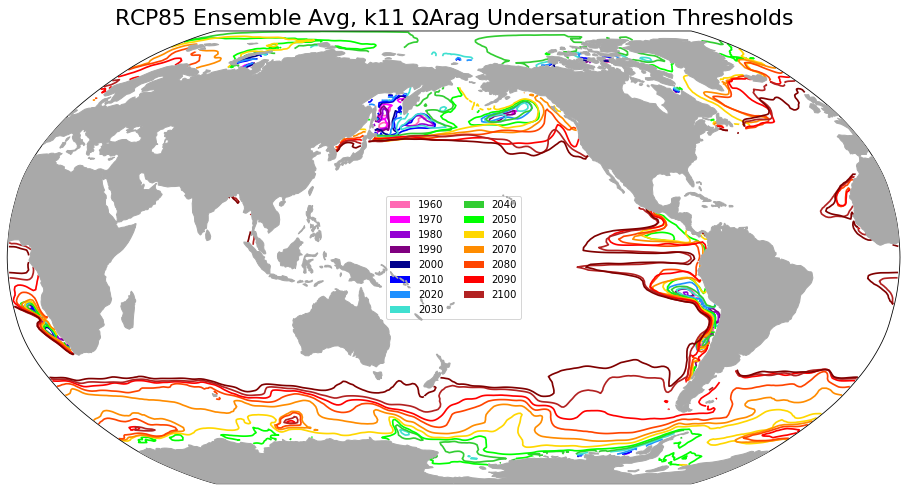

In [7]:
# Plot Velocities at undersaturation border for every 2 years
fig, ax = plt.subplots(figsize=[16,10],
                               subplot_kw={'projection':crs})
    
# Plot contours for each decade
c = 0
for i in range(0, num_contours, interval):
    cs = ax.contour(lon,lat,da_oa_mean[i],levels=clevs,
                    colors=colors[c],linewidths=1.7,transform=src)
    c += 1
    
ax.legend(handles=legend_years, loc='center',ncol=2)
ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
ax.set_title('RCP85 Ensemble Avg, k11 $\Omega$Arag Undersaturation Thresholds',
             fontsize=22)
ax.set_global()

## Get points along contours

In [12]:
# # Calculate Velocities at undersaturation border for every 2 years
# fig, ax = plt.subplots(figsize=[16,10],
#                                subplot_kw={'projection':crs})

# # Extract points from contour line segments for each year
# list_xpoints = []  # list contianing lists of x points for each year
# list_ypoints = []  # list contianing lists of y points for each year
# for i in range(0, num_contours):
#     cs = ax.contour(lon,lat,da_oa_mean[i],levels=clevs,
#                     colors=colors[i%num_colors],transform=src)

#     segments = cs.allsegs[0]
#     num_segs = len(segments)

#     xpoints = []  # to track multiple paths within each year
#     ypoints = []
#     for j in range(num_segs):
#         x = segments[j][:,0].tolist()  # convert to list to be easily concatenated
#         y = segments[j][:,1].tolist()
#         for p in x:
#             xpoints.append(p)
#         for p in y:
#             ypoints.append(p)
#     list_xpoints.append(xpoints)  # add list of x points for each year
#     list_ypoints.append(ypoints)  # add list of y points for each year

# ax.set_title('RCP85 Ensemble Avg, k11 $\Omega$Arag Undersaturation Thresholds',
#              fontsize=22)
# ax.add_feature(cfeature.LAND,zorder=10,facecolor='darkgray')
# ax.set_global()

## Calculations

In [9]:
%reload_ext autoreload
%autoreload 2
from chazbpei2020.preprocessing import *

In [10]:
%%time
# For each contour, compute the minimum distance to the contour at
# the end of the interval

# Create parallel arrays of list to hold lists of directions and vectors for each decade
list_vector_dx = []  # change in x
list_vector_dy = []  # change in y
list_vector_magnitude = []  # distance to nearest points

for i in range(0, num_contours-interval):
    vector_dx = []  # change in x for decade
    vector_dy = []  # change in y for decade
    vector_magnitude = []  # vector magnitude for year
    xpoints = list_xpoints[i]  # x coords for year
    ypoints = list_ypoints[i]  # y coords for year
    # For each point, find min dist and closest point on contour 
    # at the end of the time interval (one decade later)
    num_points = len(xpoints)
    for p in range(num_points):
        xp = xpoints[p] # x value along contour
        yp = ypoints[p] # y value along contour
        x,y,dx,dy,mindist = min_dist(xp,yp,
                                     list_xpoints[i+interval],
                                     list_ypoints[i+interval],
                                    da_oa_mean[i].data)
        # maintain lists of x and y vectors
#         vector_dx.append(dx/1000)
#         vector_dy.append(dy/1000)
        vector_magnitude.append(mindist/1000)  # dist magnitude
        
#     list_vector_dx.append(vector_dx)
#     list_vector_dy.append(vector_dy)
    list_vector_magnitude.append(vector_magnitude)

KeyboardInterrupt: 

In [11]:
# Clean list of vector magnitudes to eliminate NaN values
cleaned_vector_magnitude = []  # distances with NaN values filtered out
cleaned_list_xpoints = []
cleaned_list_ypoints = []

vel_data_range = num_contours-interval
max_len = 0
for i in range(0, vel_data_range):
    xpoints = list_xpoints[i]   # get all x and y points to filter in parallel
    ypoints = list_ypoints[i]

    cleaned_magnitude = []
    cleaned_xpoints = []
    cleaned_ypoints = []
    vector_magnitude = list_vector_magnitude[i]
    num_pts = len(list_vector_magnitude[i])

    for p in range(num_pts):
        val = vector_magnitude[p]
        # add finite values to cleaned list of magnitudes
        if (val == val):  # use trick that np.nan != np.nan
            cleaned_magnitude.append(val)
            cleaned_xpoints.append(xpoints[p])
            cleaned_ypoints.append(ypoints[p])

    cleaned_pts = len(cleaned_magnitude)
    if cleaned_pts > max_len:
        max_len = cleaned_pts

    cleaned_vector_magnitude.append(cleaned_magnitude)
    cleaned_list_xpoints.append(cleaned_xpoints)
    cleaned_list_ypoints.append(cleaned_ypoints)

for i in range(0, vel_data_range):
    cleaned_magnitude = cleaned_vector_magnitude[i]
    cleaned_xpoints = cleaned_list_xpoints[i]
    cleaned_ypoints = cleaned_list_ypoints[i]

    for j in range(len(cleaned_magnitude),max_len):
        cleaned_magnitude.append(np.nan)
        cleaned_xpoints.append(np.nan)
        cleaned_ypoints.append(np.nan)

IndexError: list index out of range

## Save DataArray for future use

In [ ]:
# Sort out how to store arrays in parallel
# run calculation for all of tomorrow

# Save precalculated dataarrays and create 3D DataArray
ens_name = 'ens101'
years = np.arange(1950,2091)
val_idx = np.arange(0,max_len)

# save entire ensemble member in one dataset
da_velocity = xr.DataArray(np.array(cleaned_vector_magnitude), 
                             dims=['year','val_idx'], coords=[years,val_idx],
                             name='velocity')
da_velocity.to_netcdf('./oa_ensemble_escvel/ens_values/'+ens_name)

da_xpoints = xr.DataArray(np.array(cleaned_list_xpoints), 
                             dims=['year','val_idx'], coords=[years,val_idx],
                             name='xpoints')
da_xpoints.to_netcdf('./oa_ensemble_escvel/ens_xcoords/'+ens_name)


da_ypoints = xr.DataArray(np.array(cleaned_list_ypoints), 
                             dims=['year','val_idx'], coords=[years,val_idx],
                             name='ypoints')
da_ypoints.to_netcdf('./oa_ensemble_escvel/ens_ycoords/'+ens_name)

---

---

---

## Read and parse DataArrays

In [13]:
ensmbr_data = xr.open_dataset('./oa_ensemble_escvel/ens_values/ens101')
da_xcoords = xr.open_dataset('./oa_ensemble_escvel/ens_xcoords/ens101')
da_ycoords = xr.open_dataset('./oa_ensemble_escvel/ens_ycoords/ens101')

In [14]:
# Read in DataArray for each Ensemble
num_members = 30
list_ensmbrs_data = []
list_ensmbrs_xp = []
list_ensmbrs_yp = []
list_ensmbrs_data.append(None)  # offset so indices match ensemble number
list_ensmbrs_xp.append(None)
list_ensmbrs_yp.append(None)

for m in range(1,num_members+1):
    if m < 10:
        ens_name = 'ens10'+str(m)
    else:
        ens_name = 'ens1'+str(m)

    vel_path = './oa_ensemble_escvel/ens_values/'+ens_name
    x_path = './oa_ensemble_escvel/ens_xcoords/'+ens_name
    y_path = './oa_ensemble_escvel/ens_ycoords/'+ens_name
    
    da_velocity = xr.open_dataset(vel_path)
    da_xpoints = xr.open_dataset(x_path)
    da_ypoints = xr.open_dataset(y_path)
    
    list_ensmbrs_data.append(da_velocity)
    list_ensmbrs_xp.append(da_xpoints)
    list_ensmbrs_yp.append(da_ypoints)

In [15]:
# Clean data (filter out filler np.nan values)
list_ensmbrs_vel = []
list_ensmbrs_xpoints = []
list_ensmbrs_ypoints = []
list_ensmbrs_vel.append(None)  # offset so indices match ensemble number
list_ensmbrs_xpoints.append(None)
list_ensmbrs_ypoints.append(None)

vel_data_range = len(da_velocity.year)

# For each Ensemble member, clean the dataset
for m in range(1,num_members+1):
    cleaned_vel = []
    cleaned_xpoints = []
    cleaned_ypoints = []
    ensmbr_data = list_ensmbrs_data[m]
    ensmbr_xpoints = list_ensmbrs_xp[m]
    ensmbr_ypoints = list_ensmbrs_yp[m]
    max_len = len(ensmbr_data.val_idx)
    
    # Clean escape velocity lists for each year
    for i in range(0, vel_data_range):
        escvel = ensmbr_data.isel(year=i).velocity.data.tolist()
        xpoints = ensmbr_xpoints.isel(year=i).xpoints.data.tolist()
        ypoints = ensmbr_ypoints.isel(year=i).ypoints.data.tolist()
        nan_idx = None
        for p in range(0,max_len):
            val = escvel[p]
            if val != val:
                nan_idx = p  # track index where filler NaN values start
                break
                
        del escvel[p:]
        del xpoints[p:]
        del ypoints[p:]

        cleaned_vel.append(escvel)
        cleaned_xpoints.append(xpoints)
        cleaned_ypoints.append(ypoints)
        
    list_ensmbrs_vel.append(cleaned_vel)
    list_ensmbrs_xpoints.append(cleaned_xpoints)
    list_ensmbrs_ypoints.append(cleaned_ypoints)

In [84]:
# # Read in and clean DataArray for annual ensemble average
# vel_path = './oa_ensemble_escvel/ens_values/ensAvg1yr'
# x_path = './oa_ensemble_escvel/ens_xcoords/ensAvg1yr'
# y_path = './oa_ensemble_escvel/ens_ycoords/ensAvg1yr'
# ens_annualAvg_data = xr.open_dataset(vel_path)
# ens_annualAvg_xp = xr.open_dataset(x_path)
# ens_annualAvg_yp = xr.open_dataset(y_path)

# ens_annualAvg_vel = []
# ens_annualAvg_xpoints = []
# ens_annualAvg_ypoints = []
# max_len = len(ens_annualAvg_data.val_idx)

# # Clean escape velocity lists for each year
# for i in range(0, vel_data_range): # 141 years for annual avg
#     escvel = ens_annualAvg_data.isel(year=i).velocity.data.tolist()
#     xpoints = ens_annualAvg_xp.isel(year=i).xpoints.data.tolist()
#     ypoints = ens_annualAvg_yp.isel(year=i).ypoints.data.tolist()
#     nan_idx = None
#     for p in range(0,max_len):
#         val = escvel[p]
#         if val != val:
#             nan_idx = p  # track index where filler NaN values start
#             break

#     del escvel[p:]
#     del xpoints[p:]
#     del ypoints[p:]
    
#     # append each year to list of entire simulation
#     ens_annualAvg_vel.append(escvel)
#     ens_annualAvg_xpoints.append(xpoints)
#     ens_annualAvg_ypoints.append(ypoints)

In [133]:
# Read in and clean DataArray for 10-yr moving ensemble average
vel_path = './oa_ensemble_escvel/ens_values/ensAvg10yr'
x_path = './oa_ensemble_escvel/ens_xcoords/ensAvg10yr'
y_path = './oa_ensemble_escvel/ens_ycoords/ensAvg10yr'
ens_movingAvg_data = xr.open_dataset(vel_path)
ens_movingAvg_xp = xr.open_dataset(x_path)
ens_movingAvg_yp = xr.open_dataset(y_path)

ens_movingAvg_vel = []
ens_movingAvg_xpoints = []
ens_movingAvg_ypoints = []
    
# append 5 'None' years so indices match (1955 = index 5)
for y in range(5):
    ens_movingAvg_vel.append(None)
    ens_movingAvg_xpoints.append(None)
    ens_movingAvg_ypoints.append(None)

max_len = len(ens_movingAvg_data.val_idx)

# Clean escape velocity lists for each year
for i in range(0, vel_data_range-10): # 131 years for 10yr moving avg
    escvel = ens_movingAvg_data.isel(year=i).velocity.data.tolist()
    xpoints = ens_movingAvg_xp.isel(year=i).xpoints.data.tolist()
    ypoints = ens_movingAvg_yp.isel(year=i).ypoints.data.tolist()
    nan_idx = None
    for p in range(0,max_len):
        val = escvel[p]
        if val != val:
            nan_idx = p  # track index where filler NaN values start
            break

    del escvel[p:]
    del ypoints[p:]
    del xpoints[p:]

    # append each year to list of entire simulation
    ens_movingAvg_vel.append(escvel)
    ens_movingAvg_xpoints.append(xpoints)
    ens_movingAvg_ypoints.append(ypoints)

---

# Calculate Regional Mean Velocities for Ensemble Members and Ensemble Averages

In [134]:
# Calculate Natural component of variability for Ensemble Members
list_ensmbrs_global = []
list_ensmbrs_north = []
list_ensmbrs_equ = []
list_ensmbrs_south = []
list_ensmbrs_global.append(None)  # offset so indices match ensemble number
list_ensmbrs_north.append(None)
list_ensmbrs_equ.append(None)
list_ensmbrs_south.append(None)

# for each ensemble member
for m in range(1,num_members+1):
    ensmbr_vel = list_ensmbrs_vel[m] # all years in simulation
    ensmbr_xpoints = list_ensmbrs_xpoints[m]
    ensmbr_ypoints = list_ensmbrs_ypoints[m]
    
    # annual escape velocity averages for one ensemble member
    ensmbr_global_avg = []
    ensmbr_north_avg = []
    ensmbr_equ_avg = []
    ensmbr_south_avg = []
    for i in range(0, vel_data_range):
        # Get escape velocity averages by latitudinal region
        values = ensmbr_vel[i].copy() # values for specific year
        north_avg = []
        equ_avg = []
        south_avg = []
        
        ypoints = ensmbr_ypoints[i] # Get ypoints for specific year
        num_pts = len(ypoints)
        
        for n in range(num_pts): # Filter points by region
            p = ypoints[n]
            if 35 < p < 80:
                north_avg.append(values[n])
            if -40 < p < 35:
                equ_avg.append(values[n])
            if -90 < p < -40:
                south_avg.append(values[n])
                
        # Get avg velocities for each year
        global_avg = np.sum(values) / len(values)
        north_avg = np.sum(north_avg) / len(north_avg)
        equ_avg = np.sum(equ_avg) / len(equ_avg)
        south_avg = np.sum(south_avg) / len(south_avg)
        
        ensmbr_global_avg.append(global_avg)
        ensmbr_north_avg.append(north_avg)
        ensmbr_equ_avg.append(equ_avg)
        ensmbr_south_avg.append(south_avg)  
    
    list_ensmbrs_global.append(ensmbr_global_avg)
    list_ensmbrs_north.append(ensmbr_north_avg)
    list_ensmbrs_equ.append(ensmbr_equ_avg)
    list_ensmbrs_south.append(ensmbr_south_avg)

<ipython-input-134-0bd655bf8ddf>:45: RuntimeWarning: invalid value encountered in double_scalars
  south_avg = np.sum(south_avg) / len(south_avg)
<ipython-input-134-0bd655bf8ddf>:44: RuntimeWarning: invalid value encountered in double_scalars
  equ_avg = np.sum(equ_avg) / len(equ_avg)


In [135]:
# for i in range(141):
#     print(list_ensmbrs_global[1][i])
#     print(list_ensmbrs_north[1][i])
#     print()
# # len(ens_movingAvg_vel[50])

In [136]:
# Calculate annual escape velocity regional averages for moving average
movingAvg_global = []
movingAvg_north = []
movingAvg_equ = []
movingAvg_south = []

# append 5 'None' years so indices match (1955 = index 5)
for y in range(5):
    movingAvg_global.append(None)
    movingAvg_north.append(None)
    movingAvg_equ.append(None)
    movingAvg_south.append(None)

for i in range(5, vel_data_range-5):
    # Get escape velocity averages by latitudinal region
    values = ens_movingAvg_vel[i].copy() # movingAvg velocities for given year
    north_avg = []
    equ_avg = []
    south_avg = []
    
    ypoints = ens_movingAvg_ypoints[i] # Get ypoints for specific year
    num_pts = len(ypoints)
    
    for n in range(num_pts):  # Filter points by region
        p = ypoints[n]
        if 35 < p < 80:
            north_avg.append(values[n])
        if -40 < p < 35:
            equ_avg.append(values[n])
        if -90 < p < -40:
            south_avg.append(values[n])

    global_avg = np.sum(values) / len(values)
    north_avg = np.sum(north_avg) / len(north_avg)
    equ_avg = np.sum(equ_avg) / len(equ_avg)
    south_avg = np.sum(south_avg) / len(south_avg)

    movingAvg_global.append(global_avg)
    movingAvg_north.append(north_avg)
    movingAvg_equ.append(equ_avg)
    movingAvg_south.append(south_avg)

<ipython-input-136-dcb1cfd944ce>:36: RuntimeWarning: invalid value encountered in double_scalars
  south_avg = np.sum(south_avg) / len(south_avg)


# Calculate Natural Variability for Each Ensemble Member

In [168]:
# Calculate natural component of cliamte velocity
# Ens1_nat(yr) = Ens1(yr) - ( Ens_mean(yr-4: yr-5))
# Ens1_nat(yr) = Ens1(yr) - ( Ens_mean(1950: 1959))

list_ensmbrs_global_nat = []
list_ensmbrs_north_nat = []
list_ensmbrs_equ_nat = []
list_ensmbrs_south_nat = []
list_ensmbrs_global_nat.append(None)  # offset so indices match ensemble number
list_ensmbrs_north_nat.append(None)
list_ensmbrs_equ_nat.append(None)
list_ensmbrs_south_nat.append(None)

# for each ensemble members
for m in range(1,num_members+1):
    # single out each ensemble member by region
    ensmbr_global = list_ensmbrs_global[m]  
    ensmbr_north = list_ensmbrs_north[m]
    ensmbr_equ = list_ensmbrs_equ[m]
    ensmbr_south = list_ensmbrs_south[m]
    
    ensmbr_global_nat = []
    ensmbr_north_nat = []
    ensmbr_equ_nat = []
    ensmbr_south_nat = []
    # append 5 'None' years so indices match (1955 = index 5)
    for y in range(5):
        ensmbr_global_nat.append(None)
        ensmbr_north_nat.append(None)
        ensmbr_equ_nat.append(None)
        ensmbr_south_nat.append(None)
        
    # for each year in simulation
    for i in range(5, vel_data_range-5):
        ensmbr_global_nat.append(abs(ensmbr_global[i] - movingAvg_global[i]))
        ensmbr_north_nat.append(abs(ensmbr_north[i] - movingAvg_north[i]))
        ensmbr_equ_nat.append(abs(ensmbr_equ[i] - movingAvg_equ[i]))
        ensmbr_south_nat.append(abs(ensmbr_south[i] - movingAvg_south[i]))
        
    list_ensmbrs_global_nat.append(ensmbr_global_nat)
    list_ensmbrs_north_nat.append(ensmbr_north_nat)
    list_ensmbrs_equ_nat.append(ensmbr_equ_nat)
    list_ensmbrs_south_nat.append(ensmbr_south_nat)

In [169]:
# ensmbr_global = list_ensmbrs_global[m]  
# ensmbr_global[i]
# movingAvg_global[i]

In [184]:
# for i in range(141):
#     print(list_ensmbrs_global_nat[4][i])
#     print(list_ensmbrs_north_nat[4][i])
#     print()

# for m in range(1,num_members+1):
#     print(list_ensmbrs_north_nat[m][50])
# # list_global_nat_avg[50]

In [185]:
# Calculate natural variability average over ensemble members
list_global_nat_avg = []
list_north_nat_avg = []
list_equ_nat_avg = []
list_south_nat_avg = []
# append 5 'None' years so indices match (1955 = index 5)
for y in range(5):
    list_global_nat_avg.append(None)
    list_north_nat_avg.append(None)
    list_equ_nat_avg.append(None)
    list_south_nat_avg.append(None)

for i in range(5, vel_data_range-5):
    global_avg = []
    north_avg = []
    equ_avg = []
    south_avg = []
    
    for m in range(1,num_members+1):
        global_avg.append(abs(list_ensmbrs_global_nat[m][i]))
        north_avg.append(abs(list_ensmbrs_north_nat[m][i]))
        equ_avg.append(abs(list_ensmbrs_equ_nat[m][i]))
        south_avg.append(abs(list_ensmbrs_south_nat[m][i]))
        
    global_avg = np.sum(global_avg) / len(global_avg)
    north_avg = np.sum(north_avg) / len(north_avg)
    equ_avg = np.sum(equ_avg) / len(equ_avg)
    south_avg = np.sum(south_avg) / len(south_avg)
    
    list_global_nat_avg.append(global_avg)
    list_north_nat_avg.append(north_avg)
    list_equ_nat_avg.append(equ_avg)
    list_south_nat_avg.append(south_avg)

---

## Plot Anthropogenic vs Natural Change

In [149]:
# for i in range(135):
#     print(list_global_nat_avg[i])
#     print(movingAvg_global[i])
#     print()

In [172]:
# Create discrete color map and legend
bar_clrs = ['darkviolet','orange','limegreen']
regions = ['Northern Atlantic & Pacific', 'Equatorial', 'Southern']

legend_regions = []
for i in range(0, 3):
    element = Patch(facecolor=bar_clrs[i], label=regions[i])
    legend_regions.append(element)

In [210]:
# Get decadal regional escape velocity averages (natural and anthropogenic)
north_nat = []
equ_nat = []
south_nat = []

north_anth = []
equ_anth = []
south_anth = []

for i in range(50,101,10):
    north_nat.append(list_north_nat_avg[i])
    equ_nat.append(list_equ_nat_avg[i])
    south_nat.append(list_south_nat_avg[i])
    north_anth.append(movingAvg_north[i])
    equ_anth.append(movingAvg_equ[i])
    south_anth.append(movingAvg_south[i])

In [231]:
# Set context of plots
sns.set()  # context = {notebook, paper, talk, poster}
# sns.set_context(context=None)
# sns.set_style('white')
sns.reset_orig()  # revert to matplotlib presets

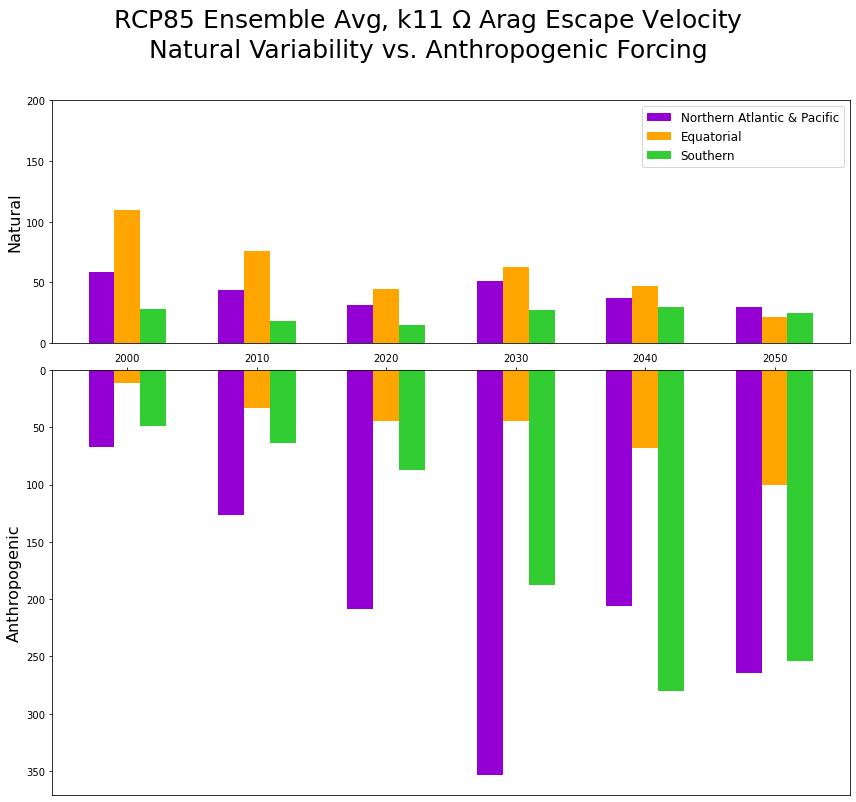

In [232]:
# Create Histograms for escape velocity distribution at each timestep
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=[12,10],
                       gridspec_kw={'height_ratios': [4, 7]}) 

labels = []
for yr in range(2000,2051,10):
    labels.append(str(yr))
    
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

ax = axs[0]
bars_north_nat = ax.bar(x - width, north_nat, width, color=bar_clrs[0], label=legend_regions[0])
bars_equ_nat = ax.bar(x, equ_nat, width, color=bar_clrs[1], label=legend_regions[1])
bars_south_nat = ax.bar(x + width, south_nat, width, color=bar_clrs[2], label=legend_regions[2])
ax.set_ylabel('Natural',fontsize=16)
ax.set_yticks(np.arange(0,201,50))
ax.set(xticks=[])
ax.legend(handles=legend_regions, loc='upper right',fontsize='large')

ax = axs[1]
bars_north_anth = ax.bar(x - width, north_anth, width, color=bar_clrs[0], label=legend_regions[0])
bars_equ_anth = ax.bar(x, equ_anth, width, color=bar_clrs[1], label=legend_regions[1])
bars_south_anth = ax.bar(x + width, south_anth, width, color=bar_clrs[2], label=legend_regions[2])
ax.set_ylabel('Anthropogenic',fontsize=16)
ax.set_yticks(np.arange(0,351,50))
# flip bars on anthropogenic graph
ax.invert_yaxis()
ax.set(xticks=x, xticklabels=labels)
ax.xaxis.tick_top()

y1 = range(200)
y2 = range(200)
# may need x

fig.tight_layout()
fig.subplots_adjust(hspace=0.08)

fig.suptitle('RCP85 Ensemble Avg, k11 $\Omega$ Arag Escape Velocity\nNatural Variability vs. Anthropogenic Forcing',
            y=1.11,fontsize=25)
fig.savefig("./oa_escvel_stats/oa_k11_escvel_regional_var")

In [233]:
# Get decadal global escape velocity averages (natural and anthropogenic)
global_nat = []
global_anth = []

for i in range(50,101,10):
    global_nat.append(list_global_nat_avg[i])
    global_anth.append(movingAvg_global[i])

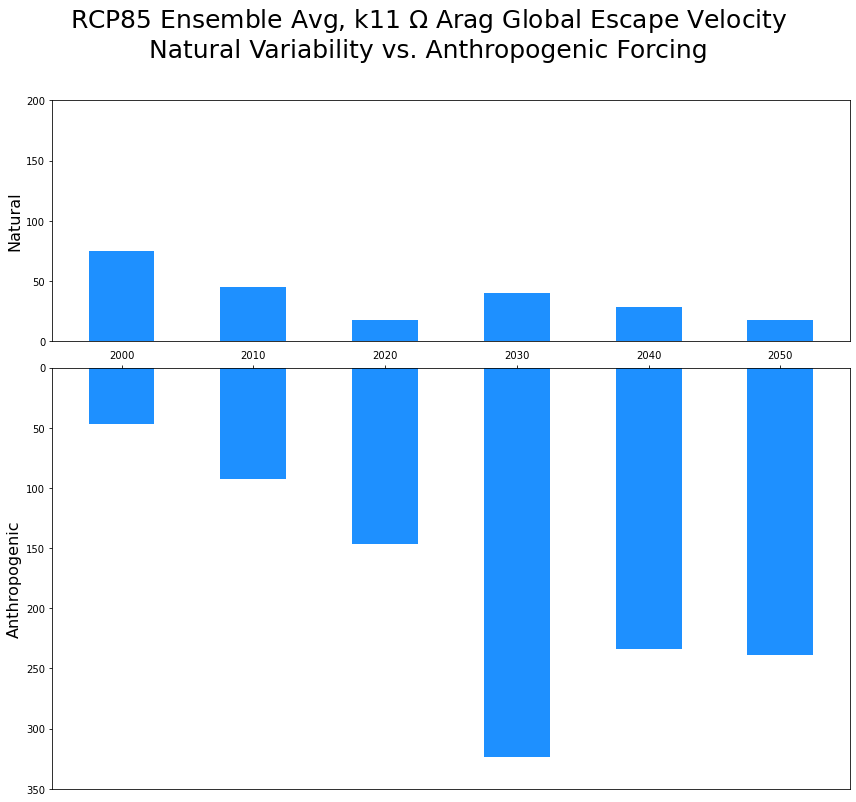

In [234]:
# Create Histograms for escape velocity distribution at each timestep
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=[12,10],
                       gridspec_kw={'height_ratios': [4, 7]}) 

labels = []
for yr in range(2000,2051,10):
    labels.append(str(yr))

    
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

ax = axs[0]
bars_global_nat = ax.bar(x, global_nat, width, color='dodgerblue', label='Global')
ax.set_ylabel('Natural',fontsize=16)
ax.set_yticks(np.arange(0,201,50))
ax.set(xticks=[])

ax = axs[1]
bars_global_anth = ax.bar(x, global_anth, width, color='dodgerblue', label='Global')
ax.set_ylabel('Anthropogenic',fontsize=16)
ax.set_yticks(np.arange(0,351,50))
# flip bars on anthropogenic graph
ax.invert_yaxis()
ax.set(xticks=x, xticklabels=labels)
ax.xaxis.tick_top()

y1 = range(200)
y2 = range(200)
# may need x

fig.tight_layout()
fig.subplots_adjust(hspace=0.08)

fig.suptitle('RCP85 Ensemble Avg, k11 $\Omega$ Arag Global Escape Velocity\nNatural Variability vs. Anthropogenic Forcing',
            y=1.11,fontsize=25)
fig.savefig("./oa_escvel_stats/oa_k11_escvel_global_var")